In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from file_utils import load_dataframes
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
transaction_items__prior = pd.read_csv(
    "data/transaction_items__prior.csv",
    na_values="unknown",
    dtype={"transaction_id": "Int64", "item_id": "Int64", "add_to_cart_order": "Int64", "previous_bought": "Int64"},
)
transaction_items__prior.drop(columns=["Unnamed: 0", "add_to_cart_order", "previous_bought"], inplace=True)
transaction_items__prior.dropna(subset=["transaction_id", "item_id"], inplace=True)
transaction_items__prior["present"] = True

In [3]:
transaction_items__prior

,transaction_id,item_id,present
0,2,33120,True
1,2,28985,True
3,2,45918,True
4,2,30035,True
5,2,17794,True
...,...,...,...
32076240,3421083,39678,True
32076241,3421083,11352,True
32076242,3421083,4600,True
32076243,3421083,24852,True


In [33]:
items = pd.read_csv(
    "data/items.csv", na_values=["unknown", "NaN"], dtype={"item_id": "Int64", "alley_id": "Int64", "category": "Int64"}
)

In [34]:
items

,Unnamed: 0,item_id,item_name,alley_id,category
0,0,1,Chocolate Sandwich Cookies,61,19
1,1,2,All-Seasons Salt,104,13
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49142,49142,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49143,49143,49685,En Croute Roast Hazelnut Cranberry,42,1
49144,49144,49686,Artisan Baguette,112,3
49145,49145,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [38]:
categories = pd.read_csv("data/categories.csv")
categories.drop(columns="Unnamed: 0", inplace=True)

In [39]:
categories

,category_id,category
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [48]:
items_categories = pd.merge(items, categories, left_on="category", right_on="category_id")
items_categories.drop(columns=["category_id", "category_x"], inplace=True)
items_categories.rename(columns={"category_y": "category"}, inplace=True)

In [49]:
items_categories

,Unnamed: 0,item_id,item_name,alley_id,category
0,0,1,Chocolate Sandwich Cookies,61,snacks
1,15,16,Mint Chocolate Flavored Syrup,103,snacks
2,24,25,Salted Caramel Lean Protein & Fiber Bar,3,snacks
3,31,32,Nacho Cheese White Bean Chips,107,snacks
4,40,41,Organic Sourdough Einkorn Crackers Rosemary,78,snacks
...,...,...,...,...,...
47617,43288,43769,Organic Pearled Barley,68,bulk
47618,45180,45682,Organic Turkish Apricots,68,bulk
47619,46375,46889,Organic Brown Basmati Rice,68,bulk
47620,46968,47489,Organic Brown Jasmine Rice,68,bulk


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'snacks'),
  Text(1, 0, 'pantry'),
  Text(2, 0, 'beverages'),
  Text(3, 0, 'frozen'),
  Text(4, 0, 'personal care'),
  Text(5, 0, 'dairy eggs'),
  Text(6, 0, 'household'),
  Text(7, 0, 'babies'),
  Text(8, 0, 'meat seafood'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'pets'),
  Text(11, 0, 'breakfast'),
  Text(12, 0, 'canned goods'),
  Text(13, 0, 'missing'),
  Text(14, 0, 'produce'),
  Text(15, 0, 'international'),
  Text(16, 0, 'deli'),
  Text(17, 0, 'alcohol'),
  Text(18, 0, 'bakery'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

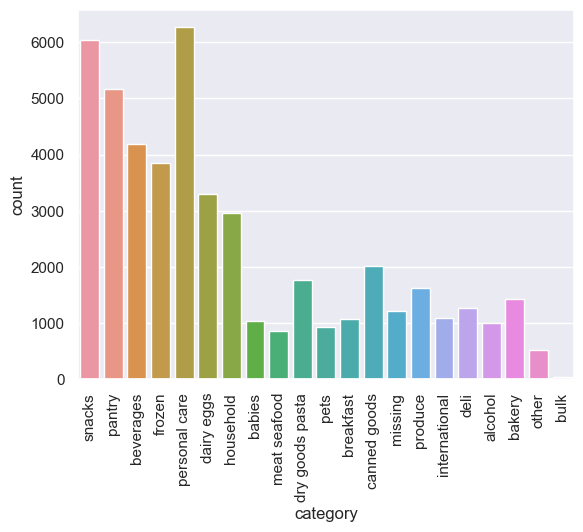

In [63]:
# plot category bar chart
sns.countplot(data=items_categories, x="category")
plt.xticks(rotation=90)

In [6]:
transaction_items = transaction_items__prior.join(items.set_index("item_id"), on="item_id")

In [7]:
transaction_items

,transaction_id,item_id,present,item_name
0,2,33120,True,Organic Egg Whites
1,2,28985,True,NaN
3,2,45918,True,Coconut Butter
4,2,30035,True,Natural Sweetener
5,2,17794,True,Carrots
...,...,...,...,...
32076240,3421083,39678,True,Free & Clear Natural Dishwasher Detergent
32076241,3421083,11352,True,Organic Mini Sandwich Crackers Peanut Butter
32076242,3421083,4600,True,All Natural French Toast Sticks
32076243,3421083,24852,True,Banana


In [8]:
transaction_items.count()

transaction_id    30074126
item_id           30074126
present           30074126
item_name         27783321
dtype: int64

In [9]:
item_counts = transaction_items.groupby("item_name").count()
item_counts

,transaction_id,item_id,present
item_name,,,
#2 Coffee Filters,728,728,728
#2 Cone White Coffee Filters,11,11,11
#2 Mechanical Pencils,8,8,8
#4 Natural Brown Coffee Filters,222,222,222
& Go! Hazelnut Spread + Pretzel Sticks,151,151,151
...,...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,36,36,36
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,51,51,51
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,63,63,63


In [10]:
top_items = item_counts.sort_values(by="transaction_id", ascending=False).head(100)

In [58]:
top_items

,transaction_id,item_id,present
item_name,,,
Banana,438213,438213,438213
Bag of Organic Bananas,351811,351811,351811
Organic Strawberries,245524,245524,245524
Organic Baby Spinach,224433,224433,224433
Organic Hass Avocado,198099,198099,198099
...,...,...,...
Organic Baby Broccoli,29452,29452,29452
Organic Spring Mix,29435,29435,29435
Whipped Cream Cheese,28948,28948,28948


In [11]:
transaction_top_items = transaction_items[transaction_items["item_name"].isin(top_items.index)]

In [12]:
transaction_top_items.count()

transaction_id    6784036
item_id           6784036
present           6784036
item_name         6784036
dtype: int64

In [13]:
def true_if_any_present(x):
    return x.any()

In [14]:
transactions_data = pd.pivot_table(
    transaction_top_items,
    index="transaction_id",
    columns="item_name",
    values="present",
    aggfunc=true_if_any_present,
    fill_value=False,
)

In [15]:
transactions_data.head()

item_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Bunched Cilantro,Carrots,...,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Vanilla Almond Breeze Almond Milk,Whipped Cream Cheese,Whole Milk,Yellow Onions
transaction_id,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
transactions_data["Banana"]

transaction_id
2          False
3          False
5          False
9          False
10          True
           ...  
3421078    False
3421080    False
3421081    False
3421082    False
3421083     True
Name: Banana, Length: 2300868, dtype: bool

In [29]:
frequent_itemsets = apriori(transactions_data, min_support=0.01, use_colnames=True)

In [30]:
frequent_itemsets

,support,itemsets
0,0.015322,(100% Raw Coconut Water)
1,0.024475,(100% Whole Wheat Bread)
2,0.014925,(2% Reduced Fat Milk)
3,0.034206,(Apple Honeycrisp Organic)
4,0.152904,(Bag of Organic Bananas)
...,...,...
116,0.011546,"(Organic Avocado, Organic Baby Spinach)"
117,0.013052,"(Organic Hass Avocado, Organic Baby Spinach)"
118,0.014268,"(Organic Baby Spinach, Organic Strawberries)"
119,0.015242,"(Organic Hass Avocado, Organic Strawberries)"


In [31]:
rules_mlxtend = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)

In [32]:
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.097543,0.152904,0.018841,0.193153,1.263237,0.003926,1.049885,0.230906
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.152904,0.097543,0.018841,0.123220,1.263237,0.003926,1.029285,0.245996
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.086098,0.152904,0.023290,0.270511,1.769162,0.010126,1.161219,0.475719
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.152904,0.086098,0.023290,0.152320,1.769162,0.010126,1.078123,0.513236
4,(Organic Raspberries),(Bag of Organic Bananas),0.055208,0.152904,0.015065,0.272871,1.784596,0.006623,1.164988,0.465340
5,(Bag of Organic Bananas),(Organic Raspberries),0.152904,0.055208,0.015065,0.098524,1.784596,0.006623,1.048050,0.519007
6,(Organic Strawberries),(Bag of Organic Bananas),0.106709,0.152904,0.023029,0.215812,1.411425,0.006713,1.080221,0.326317
7,(Bag of Organic Bananas),(Organic Strawberries),0.152904,0.106709,0.023029,0.150612,1.411425,0.006713,1.051688,0.344112
8,(Banana),(Cucumber Kirby),0.190456,0.039245,0.012021,0.063115,1.608233,0.004546,1.025478,0.467176
9,(Cucumber Kirby),(Banana),0.039245,0.190456,0.012021,0.306297,1.608233,0.004546,1.166990,0.393649


frozenset({'Organic Baby Spinach'})